In [ ]:
import warnings

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

warnings.simplefilter(action = "ignore", category = FutureWarning)

df_rainfall = pd.read_csv("/content/rain fall 2.cvs.csv")
df_rainfall.drop(columns = ["DewPointHighF", "DewPointLowF"], inplace = True)

low, high = df_rainfall["VisibilityHighMiles"].quantile([0.01, 1])
mask_visibilityH = df_rainfall["VisibilityHighMiles"].between(low, high)
low, high = df_rainfall["SeaLevelPressureAvgInches"].quantile([0.25, 1])
mask_seaLevel = df_rainfall["SeaLevelPressureAvgInches"].between(low, high)

df_rainfall = df_rainfall[mask_visibilityH & mask_seaLevel]

In [ ]:
input_ds = df_rainfall.drop(columns = ["PrecipitationSumInches", "Unnamed: 0"])
output_ds = df_rainfall["PrecipitationSumInches"]

In [ ]:
df_rainfall.head(10)

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1,1,56,48,39,36,93,68,43,30.13,10,10,5,16,6,25,0.0
2,2,58,45,32,27,76,52,27,30.49,10,10,10,8,3,12,0.0
3,3,61,46,31,28,89,56,22,30.45,10,10,7,12,4,20,0.0
4,4,58,50,41,40,86,71,56,30.33,10,10,7,10,2,16,0.0
5,5,57,48,39,36,79,63,47,30.40,10,9,7,12,3,17,0.0
6,6,60,53,45,39,83,65,47,30.39,10,9,7,7,1,11,0.0
7,7,62,51,40,39,92,64,36,30.17,10,10,7,10,2,14,0.0
8,8,64,50,36,41,92,76,60,30.10,10,10,4,17,5,24,0.0
9,9,44,40,35,26,75,60,45,30.33,10,10,10,13,5,21,0.0
10,10,55,46,36,28,76,54,32,30.39,10,10,10,8,1,12,0.0


In [ ]:
df_rainfall.tail(10)

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1305,1305,100,88,76,70,88,61,33,29.98,10,10,10,14,5,20,0.00
1306,1306,101,89,77,70,88,60,31,30.07,10,10,10,18,5,29,0.00
1307,1307,103,90,77,69,85,56,27,30.03,10,10,10,14,5,22,0.00
1308,1308,104,91,77,68,85,56,27,29.95,10,10,10,14,5,24,0.00
1311,1311,102,89,76,71,91,60,29,29.95,10,10,9,13,3,19,0.01
1312,1312,103,91,78,71,91,61,31,30.03,10,10,9,15,7,24,0.00
1313,1313,103,91,78,70,91,58,25,30.03,10,10,10,15,6,27,0.00
1314,1314,103,89,75,67,82,54,25,29.97,10,10,10,12,5,21,0.00
1317,1317,106,93,79,68,69,48,27,29.91,10,10,10,13,4,20,0.00
1318,1318,99,88,77,61,64,43,22,29.97,10,10,10,12,4,20,0.00


In [ ]:
df_rainfall.drop(columns = ["Unnamed: 0"], inplace = True)

In [ ]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 1 to 1318
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempHighF                  1008 non-null   int64  
 1   TempAvgF                   1008 non-null   int64  
 2   TempLowF                   1008 non-null   int64  
 3   DewPointAvgF               1008 non-null   int64  
 4   HumidityHighPercent        1008 non-null   int64  
 5   HumidityAvgPercent         1008 non-null   int64  
 6   HumidityLowPercent         1008 non-null   int64  
 7   SeaLevelPressureAvgInches  1008 non-null   float64
 8   VisibilityHighMiles        1008 non-null   int64  
 9   VisibilityAvgMiles         1008 non-null   int64  
 10  VisibilityLowMiles         1008 non-null   int64  
 11  WindHighMPH                1008 non-null   int64  
 12  WindAvgMPH                 1008 non-null   int64  
 13  WindGustMPH                1008 non-null   int64  
 1

In [ ]:
df_rainfall.head()

,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1,56,48,39,36,93,68,43,30.13,10,10,5,16,6,25,0.0
2,58,45,32,27,76,52,27,30.49,10,10,10,8,3,12,0.0
3,61,46,31,28,89,56,22,30.45,10,10,7,12,4,20,0.0
4,58,50,41,40,86,71,56,30.33,10,10,7,10,2,16,0.0
5,57,48,39,36,79,63,47,30.40,10,9,7,12,3,17,0.0


In [ ]:
df_rainfall.tail()

,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1312,103,91,78,71,91,61,31,30.03,10,10,9,15,7,24,0.0
1313,103,91,78,70,91,58,25,30.03,10,10,10,15,6,27,0.0
1314,103,89,75,67,82,54,25,29.97,10,10,10,12,5,21,0.0
1317,106,93,79,68,69,48,27,29.91,10,10,10,13,4,20,0.0
1318,99,88,77,61,64,43,22,29.97,10,10,10,12,4,20,0.0


In [ ]:
input_ds.head()

,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH
1,56,48,39,36,93,68,43,30.13,10,10,5,16,6,25
2,58,45,32,27,76,52,27,30.49,10,10,10,8,3,12
3,61,46,31,28,89,56,22,30.45,10,10,7,12,4,20
4,58,50,41,40,86,71,56,30.33,10,10,7,10,2,16
5,57,48,39,36,79,63,47,30.40,10,9,7,12,3,17


In [ ]:
input_ds.shape

(1008, 14)

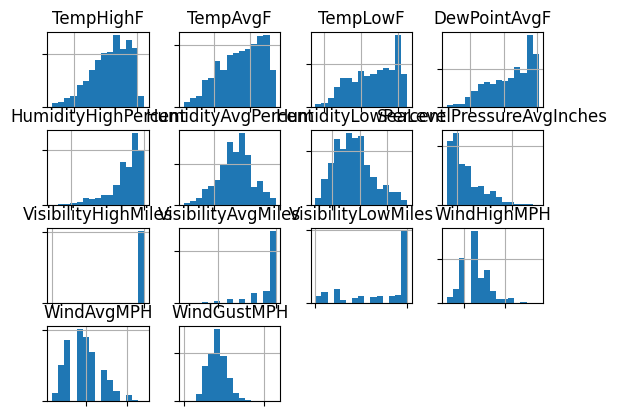

In [ ]:
new_df = df_rainfall.drop(columns=["PrecipitationSumInches"])
distr_hist = new_df.hist(bins=15)

for axis in distr_hist.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

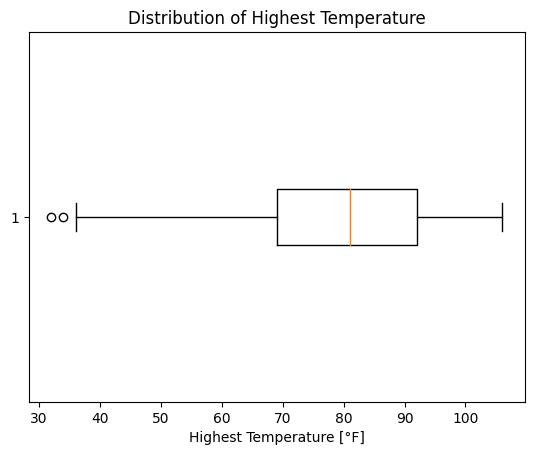

In [ ]:
plt.boxplot(df_rainfall["TempHighF"], vert = False)
plt.xlabel("Highest Temperature [°F]")
plt.title("Distribution of Highest Temperature");

In [ ]:
df_rainfall["TempHighF"].describe()

,TempHighF
count,1008.000000
mean,79.078373
std,15.522569
min,32.000000
25%,69.000000
50%,81.000000
75%,92.000000
max,106.000000


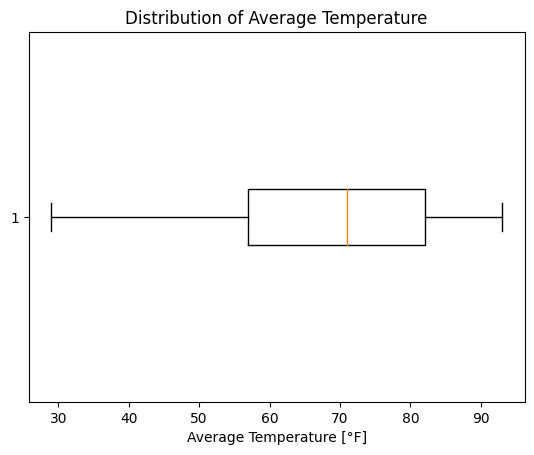

In [ ]:
plt.boxplot(df_rainfall["TempAvgF"], vert = False)
plt.xlabel("Average Temperature [°F]")
plt.title("Distribution of Average Temperature");

In [ ]:
df_rainfall["TempAvgF"].describe()

,TempAvgF
count,1008.000000
mean,68.929563
std,14.742881
min,29.000000
25%,57.000000
50%,71.000000
75%,82.000000
max,93.000000


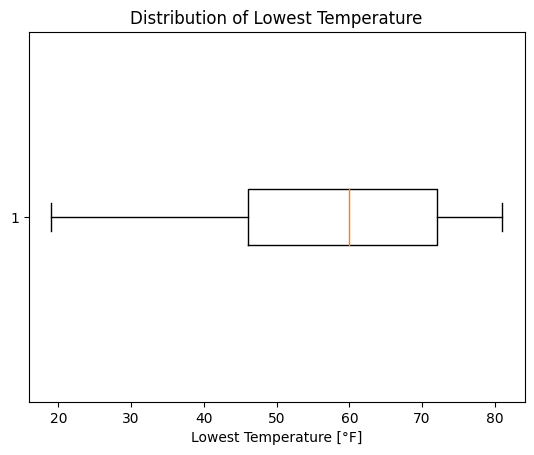

In [ ]:
plt.boxplot(df_rainfall["TempLowF"], vert = False)
plt.xlabel("Lowest Temperature [°F]")
plt.title("Distribution of Lowest Temperature");

In [ ]:
df_rainfall["TempLowF"].describe()

,TempLowF
count,1008.000000
mean,58.269841
std,14.835229
min,19.000000
25%,46.000000
50%,60.000000
75%,72.000000
max,81.000000


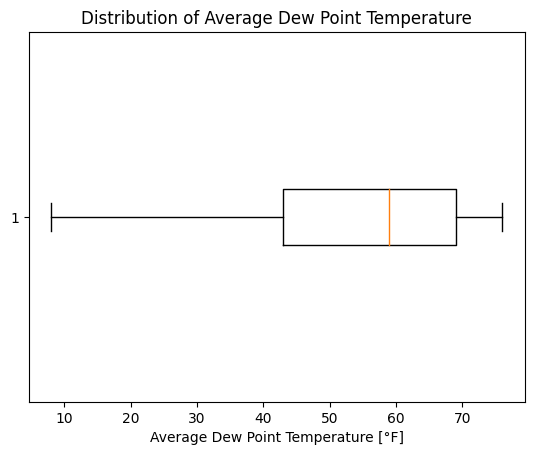

In [ ]:
plt.boxplot(df_rainfall["DewPointAvgF"], vert = False)
plt.xlabel("Average Dew Point Temperature [°F]")
plt.title("Distribution of Average Dew Point Temperature");

In [ ]:
df_rainfall["DewPointAvgF"].describe()

,DewPointAvgF
count,1008.000000
mean,54.822421
std,15.690123
min,8.000000
25%,43.000000
50%,59.000000
75%,69.000000
max,76.000000


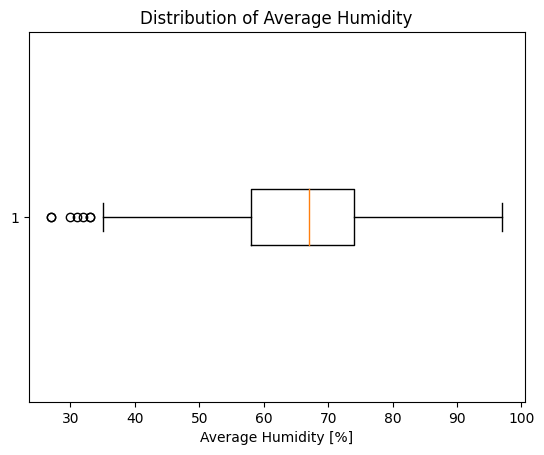

In [ ]:
plt.boxplot(df_rainfall["HumidityAvgPercent"], vert = False)
plt.xlabel("Average Humidity [%]")
plt.title("Distribution of Average Humidity");

In [ ]:
df_rainfall["HumidityAvgPercent"].describe()


,HumidityAvgPercent
count,1008.000000
mean,66.210317
std,12.755567
min,27.000000
25%,58.000000
50%,67.000000
75%,74.000000
max,97.000000


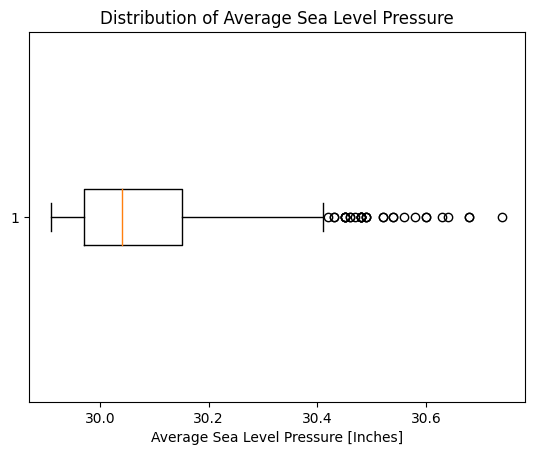

In [ ]:
plt.boxplot(df_rainfall["SeaLevelPressureAvgInches"], vert = False)
plt.xlabel("Average Sea Level Pressure [Inches]")
plt.title("Distribution of Average Sea Level Pressure");

In [ ]:
df_rainfall["SeaLevelPressureAvgInches"].describe()

,SeaLevelPressureAvgInches
count,1008.000000
mean,30.081349
std,0.146358
min,29.910000
25%,29.970000
50%,30.040000
75%,30.150000
max,30.740000


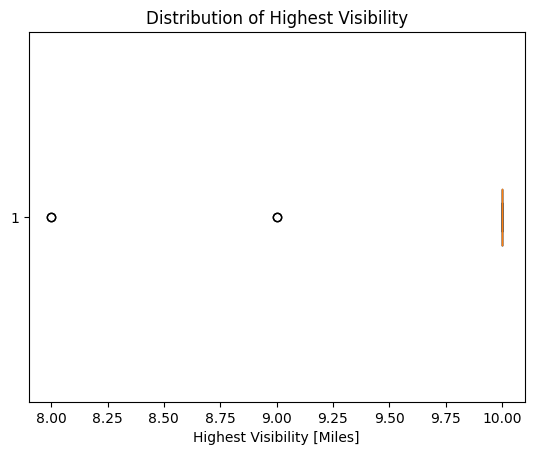

In [ ]:
plt.boxplot(df_rainfall["VisibilityHighMiles"], vert = False)
plt.xlabel("Highest Visibility [Miles]")
plt.title("Distribution of Highest Visibility");

In [ ]:
df_rainfall["VisibilityHighMiles"].describe()


,VisibilityHighMiles
count,1008.000000
mean,9.994048
std,0.099474
min,8.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,10.000000


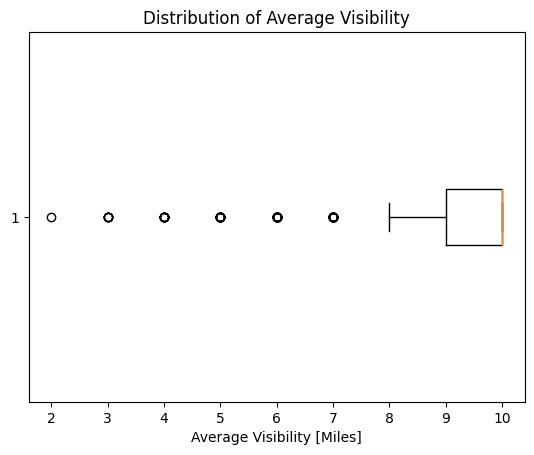

In [ ]:
plt.boxplot(df_rainfall["VisibilityAvgMiles"], vert = False)
plt.xlabel("Average Visibility [Miles]")
plt.title("Distribution of Average Visibility");

In [ ]:
df_rainfall["VisibilityAvgMiles"].describe()


,VisibilityAvgMiles
count,1008.000000
mean,9.230159
std,1.435333
min,2.000000
25%,9.000000
50%,10.000000
75%,10.000000
max,10.000000


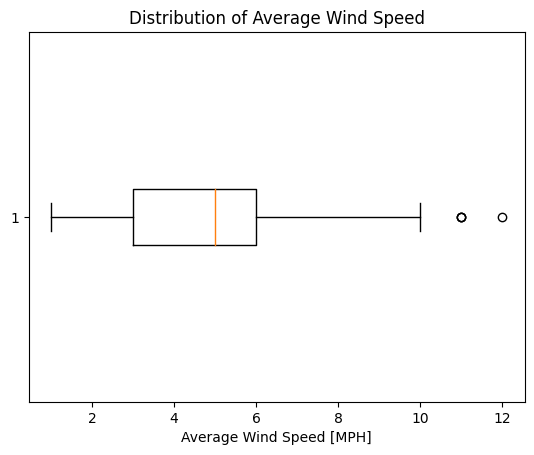

In [ ]:
plt.boxplot(df_rainfall["WindAvgMPH"], vert = False)
plt.xlabel("Average Wind Speed [MPH]")
plt.title("Distribution of Average Wind Speed");

In [ ]:
df_rainfall["WindAvgMPH"].describe()

,WindAvgMPH
count,1008.000000
mean,4.767857
std,2.029494
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,12.000000


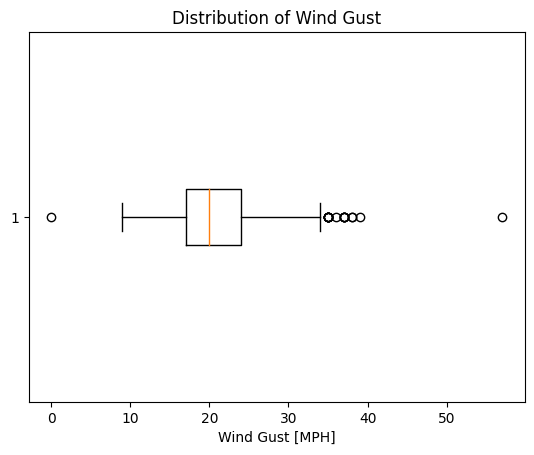

In [ ]:
plt.boxplot(df_rainfall["WindGustMPH"], vert = False)
plt.xlabel("Wind Gust [MPH]")
plt.title("Distribution of Wind Gust");

In [ ]:
df_rainfall["WindGustMPH"].describe()

,WindGustMPH
count,1008.000000
mean,20.609127
std,5.677006
min,0.000000
25%,17.000000
50%,20.000000
75%,24.000000
max,57.000000


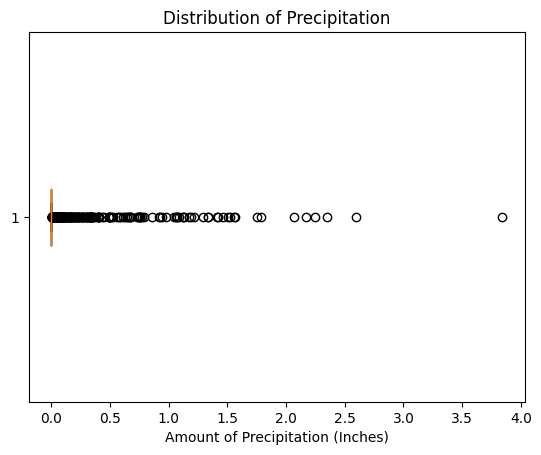

In [ ]:
plt.boxplot(df_rainfall["PrecipitationSumInches"], vert = False)
plt.xlabel("Amount of Precipitation (Inches)")
plt.title("Distribution of Precipitation");

In [ ]:
df_rainfall["PrecipitationSumInches"].describe()


,PrecipitationSumInches
count,1008.000000
mean,0.087073
std,0.306352
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.840000


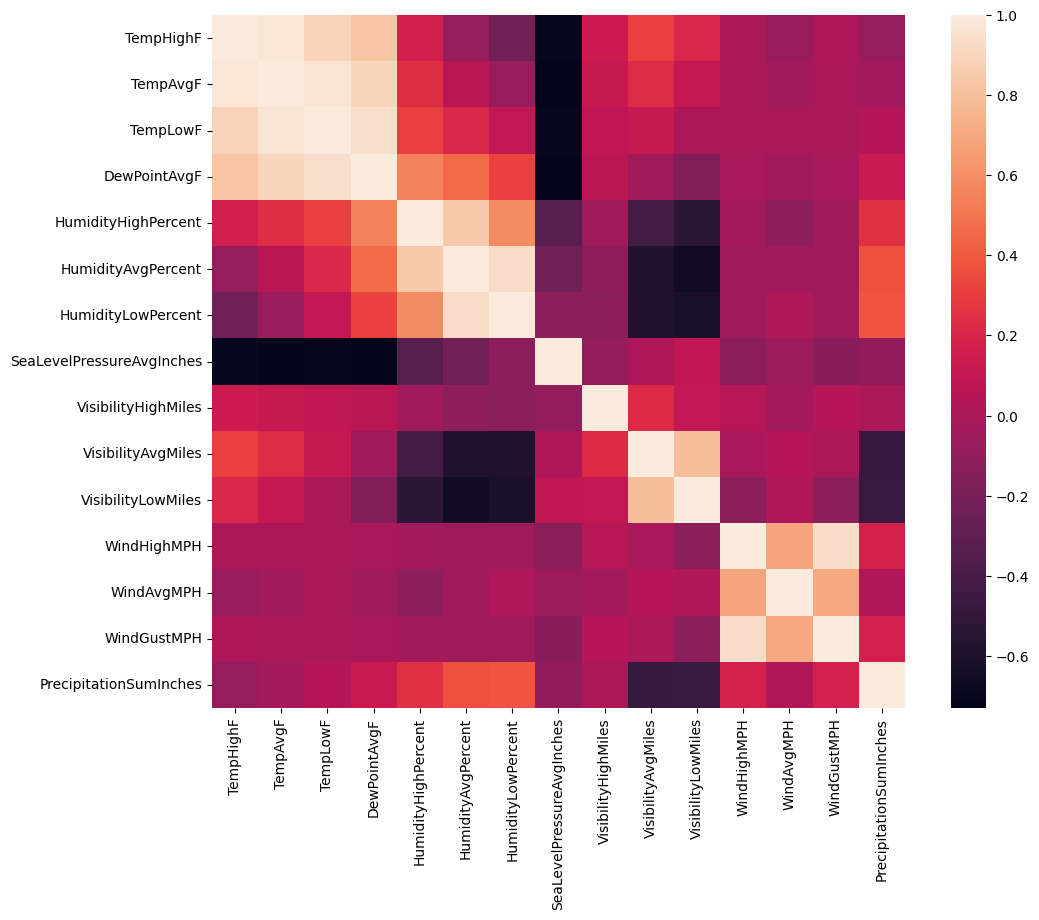

In [ ]:
corrmatrix = df_rainfall.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = 1.0, square = True)
plt.show()

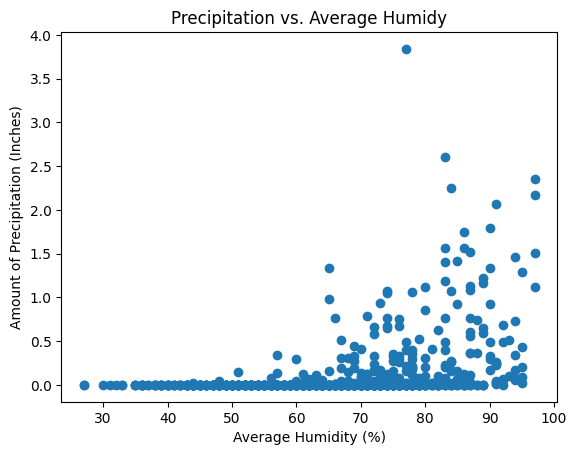

In [ ]:
plt.scatter(df_rainfall["HumidityAvgPercent"], df_rainfall["PrecipitationSumInches"])
plt.xlabel("Average Humidity (%)")
plt.ylabel("Amount of Precipitation (Inches)")
plt.title("Precipitation vs. Average Humidy");

In [ ]:
p_correlation = df_rainfall["HumidityAvgPercent"].corr(df_rainfall["PrecipitationSumInches"])
print("The Pearson correlation coefficient is: ", p_correlation)

The Pearson correlation coefficient is:  0.3681990786463324


In [ ]:
print(input_ds.shape, output_ds.shape)

(1008, 14) (1008,)


In [ ]:
input_train, input_test, output_train, output_test = train_test_split(input_ds, output_ds, test_size = 0.2, random_state = 42)

print("input train: ", input_train.shape)
print("\ninput test: ", input_test.shape)
print("\noutput train: ", output_train.shape)
print("\noutput test: ", output_test.shape)

input train:  (806, 14)

input test:  (202, 14)

output train:  (806,)

output test:  (202,)


In [ ]:
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)

In [ ]:
print(input_train[:10])

[[-1.05255844 -1.23480713 -1.38764384 -2.05959806 -2.63694306 -2.23259463
  -1.56512579  1.58762965  0.05761512  0.54358645  0.83061291  0.67215627
   0.62588596  0.78520543]
 [-1.69273509 -1.23480713 -0.7194392  -0.72643975  0.77073194  0.68428437
   0.54127174  0.425014    0.05761512 -0.90477943 -1.39447727  0.67215627
  -0.36520261  0.25233236]
 [ 1.12404218  0.98464145  0.75061103  0.54323484 -0.79495657 -0.85517955
  -0.72256678 -0.6692125   0.05761512  0.54358645  0.83061291 -0.86169977
  -0.36520261 -0.63578941]
 [ 0.3558302  -0.15871085 -0.7194392  -0.66295602 -0.1502613  -0.93620396
  -1.32439464 -0.46404503  0.05761512  0.54358645  0.83061291 -1.16847097
  -0.8607469  -0.2805407 ]
 [ 0.1637772   0.37933729  0.55014963  0.54323484  1.13912924  0.84633321
   0.54127174  0.425014    0.05761512 -0.18059649 -0.56006845  0.36538506
   0.62588596  0.42995672]
 [-2.07684108 -1.97462333 -1.78856663 -1.61521196  0.40233464  0.36018671
   0.2403578   1.17729471  0.05761512  0.54358645 -

In [ ]:
y_train_mean = output_train.mean()
y_pred_baseline = [y_train_mean] * len(output_train)
mae_baseline = mean_absolute_error(output_train, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(output_train, y_pred_baseline))
print("Mean precipitation level is: ", round(y_train_mean, 2))
print("Baseline MAE is: ", round(mae_baseline, 2))
print("Baseline RMSE is: ", round(rmse_baseline, 2))

Mean precipitation level is:  0.09
Baseline MAE is:  0.14
Baseline RMSE is:  0.3


In [ ]:
model = LinearRegression()
model.fit(input_train, output_train)

print("The intercept is: ", model.intercept_)
print("\nThe coefficient is: ", model.coef_)

predictions_lr = model.predict(input_train)

The intercept is:  0.08528535980148888

The coefficient is:  [ 0.24571219 -0.33747861  0.31965307 -0.22037346  0.12773646 -0.25306266
  0.27313453 -0.00437155  0.02615958 -0.10718213 -0.02063717  0.07573155
 -0.07114171  0.02975905]


In [ ]:
mae_training = mean_absolute_error(output_train, predictions_lr)
print("The training MAE is: ", round(mae_training, 2), "\n")
scores = cross_val_score(model, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))


display_scores(rmse_scores)

The training MAE is:  0.12 

Scores RMSE:  [0.2380799  0.20186494 0.18686664 0.37246955 0.2041969  0.17203585
 0.45722685 0.16922172 0.19475157 0.17712903]
Standard deviation:  0.09266019734473512 

Mean RMSE is:  0.24


In [ ]:
mlpr = MLPRegressor(hidden_layer_sizes = (16,), solver = 'lbfgs', max_iter = 10000)
mlpr.fit(input_train, output_train)

predictions_mlpr = mlpr.predict(input_train)

In [ ]:
mae_training = mean_absolute_error(output_train, predictions_mlpr)
print("The training MAE is: ", round(mae_training, 2), "\n")
scores = cross_val_score(mlpr, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))


display_scores(rmse_scores)

The training MAE is:  0.06 

Scores RMSE:  [0.57479367 0.26635304 0.20445781 0.41505691 0.51867728 0.23039185
 0.44854682 1.02412818 0.3149214  0.82066565]
Standard deviation:  0.2527664064951168 

Mean RMSE is:  0.48


In [ ]:
kn_reg = KNeighborsRegressor(n_neighbors = 2)
kn_reg.fit(input_train, output_train)

predictions_knn = kn_reg.predict(input_train)

In [ ]:
mae_training = mean_absolute_error(output_train, predictions_knn)
print("The training MAE is: ", round(mae_training, 2), "\n")
scores = cross_val_score(kn_reg, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))


display_scores(rmse_scores)

The training MAE is:  0.04 

Scores RMSE:  [0.23882557 0.24624025 0.15695993 0.33372616 0.34425443 0.23153074
 0.36634768 0.18402615 0.1782642  0.17060737]
Standard deviation:  0.07357095109061319 

Mean RMSE is:  0.25


In [ ]:
ridge = Ridge()
ridge.fit(input_train, output_train)

print("The intercept is: ", ridge.intercept_)
print("\nThe coefficient is: ", ridge.coef_)

predictions_r = ridge.predict(input_train)

The intercept is:  0.08528535980148894

The coefficient is:  [ 0.04992996  0.01210887  0.12862574 -0.19040192  0.06355513 -0.11830609
  0.17414104 -0.00417321  0.02595241 -0.1060957  -0.02147047  0.07447056
 -0.07048576  0.03020105]


In [ ]:
mae_training = mean_absolute_error(output_train, predictions_r)
print("The training MAE is: ", round(mae_training, 2), "\n")
scores = cross_val_score(ridge, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))


display_scores(rmse_scores)

The training MAE is:  0.12 

Scores RMSE:  [0.23829956 0.20051459 0.18617347 0.37378345 0.20453977 0.17088139
 0.45457161 0.16833494 0.19585456 0.1775039 ]
Standard deviation:  0.09237763106923419 

Mean RMSE is:  0.24


In [ ]:
ridge25 = Ridge(alpha = 25)
ridge25.fit(input_train, output_train)

print("The intercept is: ", ridge25.intercept_)
print("\nThe coefficient is: ", ridge25.coef_)

predictions_r25 = ridge25.predict(input_train)

The intercept is:  0.08528535980148885

The coefficient is:  [-0.00220235  0.01693353  0.04189331 -0.04477622 -0.01289655  0.00819891
  0.05128808 -0.00353129  0.0238549  -0.09865524 -0.02775774  0.06081555
 -0.06079119  0.03464541]


In [ ]:
mae_training = mean_absolute_error(output_train, predictions_r25)
print("The training MAE is: ", round(mae_training, 2), "\n")
scores = cross_val_score(ridge25, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))


display_scores(rmse_scores)

The training MAE is:  0.12 

Scores RMSE:  [0.23662402 0.19501727 0.18709533 0.37870844 0.20212096 0.17091138
 0.45140912 0.1678608  0.19772078 0.17910838]
Standard deviation:  0.09250044719291504 

Mean RMSE is:  0.24


In [ ]:
from sklearn.svm import SVR

regressor_linear = SVR(kernel = "linear")
regressor_linear.fit(input_train, output_train)

predictions_svr_l = regressor_linear.predict(input_train)

In [ ]:
mae_training = mean_absolute_error(output_train, predictions_svr_l)
print("The training MAE is: ", round(mae_training, 2), "\n")
scores = cross_val_score(regressor_linear, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))


display_scores(rmse_scores)

The training MAE is:  0.11 

Scores RMSE:  [0.25175962 0.17643558 0.1997258  0.41529319 0.18913161 0.17780183
 0.48623003 0.17697073 0.20984416 0.16589841]
Standard deviation:  0.10665176354804083 

Mean RMSE is:  0.24


In [ ]:
from sklearn.svm import SVR

regressor_rbf = SVR(kernel = "rbf")
regressor_rbf.fit(input_train, output_train)

predictions_svr_r = regressor_rbf.predict(input_train)

In [ ]:
mae_training = mean_absolute_error(output_train, predictions_svr_r)
print("The training MAE is: ", round(mae_training, 2), "\n")
scores = cross_val_score(regressor_rbf, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))


display_scores(rmse_scores)

The training MAE is:  0.09 

Scores RMSE:  [0.21991073 0.17131496 0.1580901  0.32496973 0.1814094  0.16502927
 0.41999116 0.13791165 0.18816222 0.13328967]
Standard deviation:  0.08717889593176742 

Mean RMSE is:  0.21
